# Social and Health Determinants of Depressive Symptoms in Older Adults: A Multivariate Analysis of the RAND HRS Dataset

Data Description
----------------
Dataset: University of Michigan - RAND HRS Longitudinal File (1992-2022)

Sample: Wave 15 (2020), N = 14,637

VARIABLES:
- r15cesd (Dependent Variable): Depression score - CES-D Scale (0–8)
- r15shlt (Independent Variable): Physical Health (1=Excellent to 5=Poor)
- raeduc (Independent Variable): Education Level (1=Less than High School to 5=Graduate)
- r15agey_e   : Age (Years)
- ragender    : Gender (1=Male, 2=Female)
- r15mstat    : Marital Status (Categorical)

# Data Loading

In [3]:
import numpy as np
import pandas as pd

df = pd.read_stata('randhrs1992_2022v1.dta')

In [4]:
df

,hhidpn,s1hhidpn,r1mstat,r1mpart,s1bmonth,s1byear,s1bdate,s1bflag,s1cohbyr,s1hrsamp,...,r8lbsatwlf,r9lbsatwlf,r10lbsatwlf,r11lbsatwlf,r12lbsatwlf,r13lbsatwlf,r14lbsatwlf,r15lbsatwlf,r16lbsatwlf,filever
0,1010,0.0,5.divorced,0.no,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
1,2010,0.0,7.widowed,0.no,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
2,3010,3020.0,1.married,0.no,9.0,1938.0,-7778.0,0.mo/yr ok,3.hrs,"1.in samp,hrs92 resp b.1931-41",...,5.4,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,X
3,3020,3010.0,1.married,0.no,1.0,1936.0,-8752.0,0.mo/yr ok,3.hrs,"1.in samp,hrs92 resp b.1931-41",...,4.6,NaN,4.2,NaN,2.4,NaN,NaN,NaN,NaN,X
4,10001010,0.0,8.never married,0.no,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.8,NaN,4.8,NaN,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45229,923525020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,X
45230,952836010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.8,NaN,5.8,NaN,6.0,NaN,NaN,X
45231,958361010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,X
45232,959733010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X


# Data Preprocessing

In [5]:
# Selecting Relevant Variables

df1 = df[['hhidpn', 'ragender', 'raeduc', 'r15agey_e', 'r15shlt', 'r15cesd', 'r15mstat']]
df1

,hhidpn,ragender,raeduc,r15agey_e,r15shlt,r15cesd,r15mstat
0,1010,1.male,5.college and above,NaN,NaN,NaN,NaN
1,2010,2.female,1.lt high-school,NaN,NaN,NaN,NaN
2,3010,1.male,3.high-school graduate,NaN,NaN,NaN,NaN
3,3020,2.female,5.college and above,NaN,NaN,NaN,NaN
4,10001010,1.male,3.high-school graduate,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45229,923525020,1.male,2.ged,65.0,4.fair,1.0,1.married
45230,952836010,2.female,1.lt high-school,61.0,3.good,1.0,5.divorced
45231,958361010,1.male,2.ged,56.0,1.excellent,0.0,4.separated
45232,959733010,1.male,4.some college,NaN,NaN,NaN,NaN


In [6]:
# Checking Data Information

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45234 entries, 0 to 45233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   hhidpn     45234 non-null  int32   
 1   ragender   45234 non-null  category
 2   raeduc     44733 non-null  category
 3   r15agey_e  15723 non-null  float64 
 4   r15shlt    15704 non-null  category
 5   r15cesd    14998 non-null  float64 
 6   r15mstat   15685 non-null  category
dtypes: category(4), float64(2), int32(1)
memory usage: 1.0 MB


In [7]:
# Checking Missing Values

df1.isnull().sum()

hhidpn           0
ragender         0
raeduc         501
r15agey_e    29511
r15shlt      29530
r15cesd      30236
r15mstat     29549
dtype: int64

In [8]:
# Handling Missing Values

df_clean = df1.dropna(subset=['raeduc', 'r15shlt', 'r15cesd', 'r15mstat'])
df_clean.isnull().sum()

hhidpn       0
ragender     0
raeduc       0
r15agey_e    0
r15shlt      0
r15cesd      0
r15mstat     0
dtype: int64

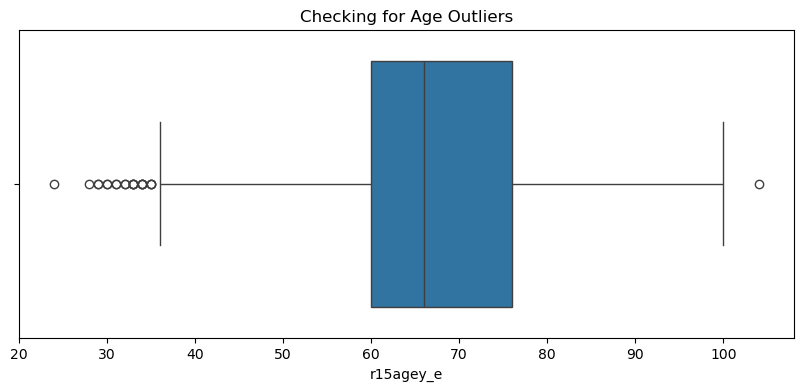

In [9]:
# Checking for Outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(x=df_clean['r15agey_e'])
plt.title('Checking for Age Outliers')
plt.show()

In [10]:
# Removing Outliers

df_final_clean = df_clean[df_clean['r15agey_e'] >= 50].copy()

In [11]:
# Converting Categorical Values into Numerical Values

df_final_clean['ragender'] = df_final_clean['ragender'].astype(str).str[0].astype(int)
df_final_clean['raeduc'] = df_final_clean['raeduc'].astype(str).str[0].astype(int)
df_final_clean['r15shlt'] = df_final_clean['r15shlt'].astype(str).str[0].astype(int)
df_final_clean['r15mstat'] = df_final_clean['r15mstat'].astype(str).str[0].astype(int)

In [12]:
# Checking Data Information Again

df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 6 to 45233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hhidpn     14637 non-null  int32  
 1   ragender   14637 non-null  int64  
 2   raeduc     14637 non-null  int64  
 3   r15agey_e  14637 non-null  float64
 4   r15shlt    14637 non-null  int64  
 5   r15cesd    14637 non-null  float64
 6   r15mstat   14637 non-null  int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 857.6 KB


In [13]:
# My Final Dataset after Preprocessing

df_final_clean

,hhidpn,ragender,raeduc,r15agey_e,r15shlt,r15cesd,r15mstat
6,10003030,2,5,64.0,2,2.0,7
8,10004040,2,3,74.0,3,0.0,3
10,10013040,2,4,72.0,3,1.0,5
11,10038010,1,5,83.0,2,1.0,1
12,10038040,2,5,77.0,2,0.0,1
...,...,...,...,...,...,...,...
45228,923525010,2,4,63.0,4,4.0,1
45229,923525020,1,2,65.0,4,1.0,1
45230,952836010,2,1,61.0,3,1.0,5
45231,958361010,1,2,56.0,1,0.0,4


# Exploratory Data Analysis (EDA)

In [14]:
## Descriptive Statistics

table_1 = df_final_clean.describe().T[['mean', 'std', 'min', '50%', 'max']]
table_1.columns = ['Mean', 'SD', 'Min', 'Median', 'Max']
print('--- Table 1: Descriptive Statistics (N=14637) ---')
table_1

--- Table 1: Descriptive Statistics (N=14637) ---


,Mean,SD,Min,Median,Max
hhidpn,4.096017e+08,2.756111e+08,10003030.0,502698020.0,959738010.0
ragender,1.596502e+00,4.906157e-01,1.0,2.0,2.0
raeduc,3.467582e+00,1.329030e+00,1.0,4.0,5.0
r15agey_e,6.814750e+01,1.011053e+01,50.0,66.0,104.0
r15shlt,2.890141e+00,1.006516e+00,1.0,3.0,5.0
r15cesd,1.541983e+00,2.043585e+00,0.0,1.0,8.0
r15mstat,3.226344e+00,2.651724e+00,1.0,1.0,8.0


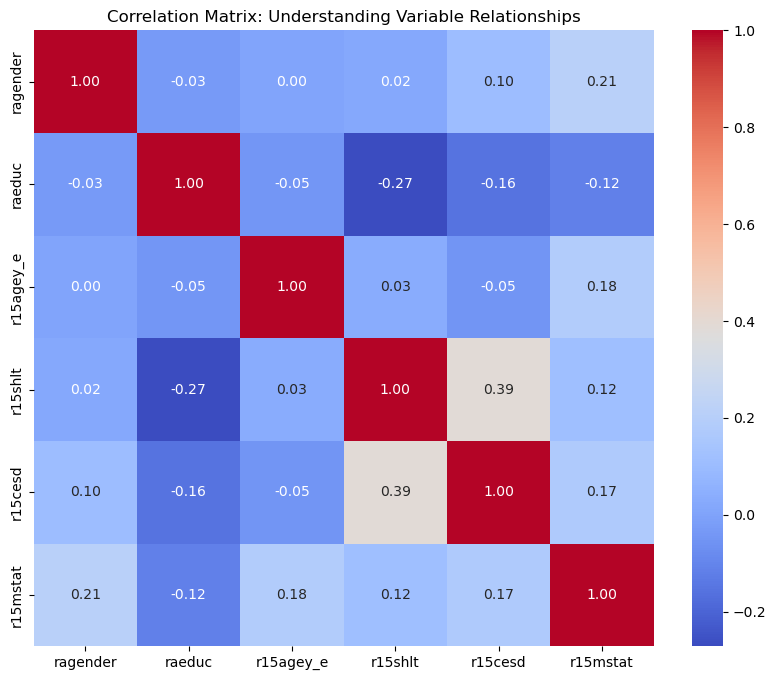

In [15]:
# Correlation Matrix

cols_for_corr = ['ragender', 'raeduc', 'r15agey_e', 'r15shlt', 'r15cesd', 'r15mstat']
corr_matrix = df_final_clean[cols_for_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Understanding Variable Relationships')
plt.show()

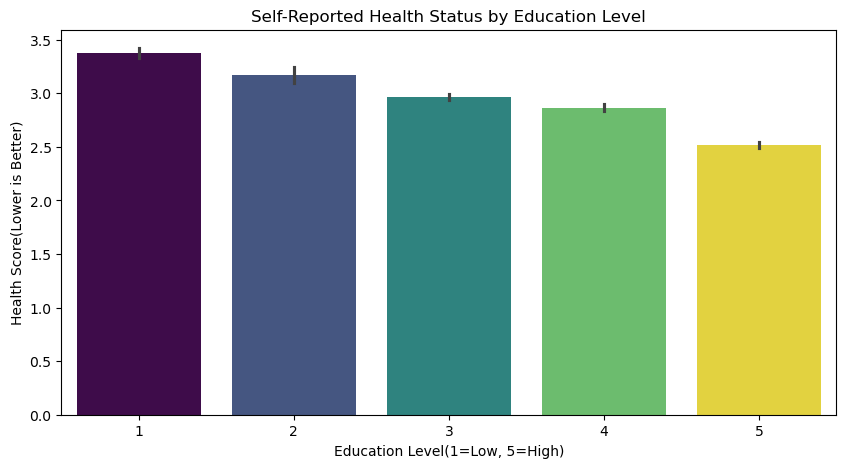

In [16]:
# Bar Graph (Health Status by Education Level)

plt.figure(figsize=(10,5))
sns.barplot(x='raeduc', y='r15shlt', data=df_final_clean, hue='raeduc', palette='viridis', legend=False)
plt.title('Self-Reported Health Status by Education Level')
plt.xlabel('Education Level(1=Low, 5=High)')
plt.ylabel('Health Score(Lower is Better)')
plt.show()

# Inferential Statistics

In [17]:
# Statistical Hypothesis Testing (T-test)
# Checking difference in Depression among Male and Female

from scipy.stats import ttest_ind

men = df_final_clean[df_final_clean['ragender'] == 1]['r15cesd']
women = df_final_clean[df_final_clean['ragender'] == 2]['r15cesd']

t_stat, p_val = ttest_ind(men, women)
print(f'P-value for Gender Difference in Depression: {p_val:.4f}')

P-value for Gender Difference in Depression: 0.0000


In [18]:
# Multivariate Regression Modeling

import statsmodels.api as sm

X = df_final_clean[['ragender', 'raeduc', 'r15agey_e', 'r15shlt', 'r15mstat']]
y = df_final_clean['r15cesd']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                r15cesd   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     643.3
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:45:58   Log-Likelihood:                -29775.
No. Observations:               14637   AIC:                         5.956e+04
Df Residuals:                   14631   BIC:                         5.961e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1026      0.136      0.755      0.4

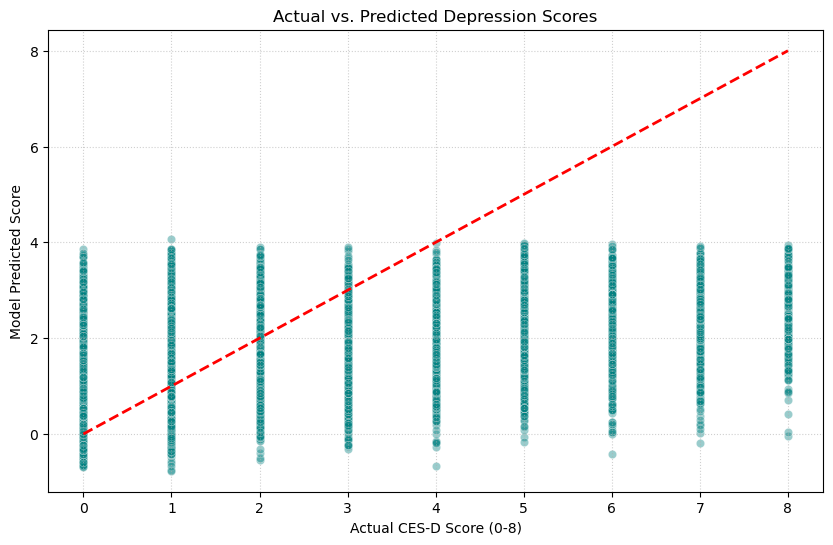

In [19]:
# Model Validation and Results

predictions = model.predict(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y, y=predictions, alpha=0.4, color='teal')

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, linestyle='--')

plt.title('Actual vs. Predicted Depression Scores')
plt.xlabel('Actual CES-D Score (0-8)')
plt.ylabel('Model Predicted Score')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()